In [1]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Font 깨짐 제거를 위해 Font 지정

import os
if os.name == 'nt' : # Windows OS
    font_family = "Malgun Gothic"
else : 
    font_family = "AppleGothic"
    
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

# 보스턴 주택가격 데이터를 이용한 실습

In [2]:
# Boston Housing Price
from sklearn.datasets import load_boston


data_b = load_boston()

df_b = pd.DataFrame(data_b.data, columns = data_b.feature_names)
df_b['MEDV'] = data_b.target
print(df_b.shape)

(506, 14)


In [3]:
df_b

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# 전체 속성 적용
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data_b.data,
                                                           data_b.target,
                                                           test_size = 0.2,
                                                           random_state = 20)

In [5]:
## 선형회귀 OLS 적합 과정
# stats model, OLS(## 선형회귀 OLS 적합과정)
import statsmodels.api as sm
from math import sqrt

# b0 상수항 추가
sm_train_x = sm.add_constant(X_train_b, has_constant = "add")

# OLS 모델
sm_model = sm.OLS(y_train_b, sm_train_x)
result_b = sm_model.fit()
result_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     83.64
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          4.51e-104
Time:                        21:33:41   Log-Likelihood:                -1211.4
No. Observations:                 404   AIC:                             2451.
Df Residuals:                     390   BIC:                             2507.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2252      5.841      6.201      0.000      24.741      47.710
x1            -0.0699      0.043     -1.638      0.102      -0.154       0.014
x2             0.0408      0.016      2.560      0.011       0.009       0.072
x3             0.0469      0.072      0.656      0.512      -0.094       0.188
x4             2.9488      0.980      3.007      0.003       1.021       4.876
x5           -21.2030      4.608     -4.601      0.000     -30.263     -12.143
x6             3.7515      0.478      7.841      0.000       2.811       4.692
x7             0.0186      0.015      1.203      0.230      -0.012       0.049
x8            -1.3352      0.231     -5.784      0.000      -1.789      -0.881
x9             0.2718      0.075      3.611      0.000       0.124       0.420
x10           -0.0112      0.004     -2.647      0.008      -0.020      -0.003
x11           -0.9020      0.155     -5.827      0.000      -1.206      -0.598
x12            0.0091      0.003      2.906      0.004       0.003       0.015
x13           -0.5663      0.058     -9.778      0.000      -0.680      -0.452
==============================================================================
Omnibus:                      146.491   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.882
Skew:                           1.567   Prob(JB):                    6.65e-130
Kurtosis:                       8.052   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
## 성능확인
from sklearn.metrics import mean_squared_error

# 예측을 위한 test 상수항 추가
sm_test_x = sm.add_constant(X_test_b, has_constant = "add")
sm_model_predict = result_b.predict(sm_test_x) # 예측

sqrt(mean_squared_error(sm_model_predict, y_test_b)) # RMSE 계산

4.061447029807441

In [7]:
## 각 변수 p-value > 0.05 정제

## 변수 선택
feature_columns = list(df_b.columns.difference(['INDUS', 'AGE', 'CRIM', 'MEDV']))

# 변수 확정
X = df_b[feature_columns] # 설명변수

In [8]:
X

,B,CHAS,DIS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,396.90,0.0,4.0900,4.98,0.538,15.3,1.0,6.575,296.0,18.0
1,396.90,0.0,4.9671,9.14,0.469,17.8,2.0,6.421,242.0,0.0
2,392.83,0.0,4.9671,4.03,0.469,17.8,2.0,7.185,242.0,0.0
3,394.63,0.0,6.0622,2.94,0.458,18.7,3.0,6.998,222.0,0.0
4,396.90,0.0,6.0622,5.33,0.458,18.7,3.0,7.147,222.0,0.0
...,...,...,...,...,...,...,...,...,...,...
501,391.99,0.0,2.4786,9.67,0.573,21.0,1.0,6.593,273.0,0.0
502,396.90,0.0,2.2875,9.08,0.573,21.0,1.0,6.120,273.0,0.0
503,396.90,0.0,2.1675,5.64,0.573,21.0,1.0,6.976,273.0,0.0
504,393.45,0.0,2.3889,6.48,0.573,21.0,1.0,6.794,273.0,0.0


In [9]:
## 데이터 생성
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X,
                                                           data_b.target,
                                                           test_size = 0.2,
                                                           random_state = 20)

print(X_train_b.shape, X_test_b.shape, y_train_b.shape, y_test_b.shape)

(404, 10) (102, 10) (404,) (102,)


In [10]:
## 선형회귀 OLS 적합 과정
# b0 상수항 추가
sm_train_x = sm.add_constant(X_train_b, has_constant = "add")

sm_model = sm.OLS(y_train_b, sm_train_x) # OLS 모델
result_a = sm_model.fit()
result_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     107.8
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          4.21e-106
Time:                        21:33:42   Log-Likelihood:                -1213.8
No. Observations:                 404   AIC:                             2450.
Df Residuals:                     393   BIC:                             2494.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0451      5.765      5.906      0.000      22.712      45.378
B              0.0103      0.003      3.382      0.001       0.004       0.016
CHAS           3.1374      0.974      3.223      0.001       1.223       5.052
DIS           -1.4037      0.214     -6.550      0.000      -1.825      -0.982
LSTAT         -0.5561      0.054    -10.207      0.000      -0.663      -0.449
NOX          -18.1965      4.222     -4.310      0.000     -26.498      -9.896
PTRATIO       -0.8594      0.153     -5.625      0.000      -1.160      -0.559
RAD            0.2112      0.068      3.113      0.002       0.078       0.345
RM             3.8948      0.466      8.359      0.000       2.979       4.811
TAX           -0.0095      0.004     -2.513      0.012      -0.017      -0.002
ZN             0.0344      0.016      2.201      0.028       0.004       0.065
==============================================================================
Omnibus:                      151.350   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.107
Skew:                           1.597   Prob(JB):                    1.24e-143
Kurtosis:                       8.375   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# 예측을 위한 test 상수항 추가
sm_test_x = sm.add_constant(X_test_b, has_constant = "add")

sm_model_predict = result_a.predict(sm_test_x) # 예측

## RMSE 결과 
sqrt(mean_squared_error(sm_model_predict,y_test_b))

4.135130074364724

In [12]:
## 선형회귀모델 생성 및 결과 확인
from sklearn.linear_model import LinearRegression

# 선형회귀 모델
linear_model1 = LinearRegression()
linear_model1 = linear_model1.fit(X_train_b, y_train_b)

predict1 = linear_model1.predict(X_test_b)

# RMSE 결과
print("RMSE : {}".format(sqrt(mean_squared_error(predict1, y_test_b))))

RMSE : 4.135130074364738


In [13]:
## Bagging Regressor 진행
from sklearn.ensemble import BaggingRegressor

# 선형 학습 모델을 parameter 로 입력
bagging_model = BaggingRegressor(base_estimator = linear_model1, #선형회귀모델
                                n_estimators = 100, #100개의 분류기, 샘플링 수
                                verbose = 0) #1 : 학습과정 표시

bagging_model = bagging_model.fit(X_train_b, y_train_b) #학습 진행

predict2 = bagging_model.predict(X_test_b) #학습된 Bagging 선형회귀 모델로 평가 데이터 에측

print("RMSE:{}".format(sqrt(mean_squared_error(predict2,y_test_b))))

RMSE:4.116550995900308


# 모델 개선

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
# 회귀분석 모델 변수
print(sm_model.exog_names)

['const', 'B', 'CHAS', 'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']


In [16]:
print(variance_inflation_factor(sm_model.exog, 1))

# B 의 VIF

1.3512019768064691


In [17]:
pd.DataFrame({'컬럼' : column, 'VIF' : variance_inflation_factor(sm_model.exog, i)}
              for i, column in enumerate(sm_model.exog_names)
              if column != 'const') #절편 제외

# 다중공선성 없는데 ㅠ?

,컬럼,VIF
0,B,1.351202
1,CHAS,1.074666
2,DIS,3.525101
3,LSTAT,2.621585
4,NOX,3.918460
5,PTRATIO,1.809721
6,RAD,5.762160
7,RM,1.825693
8,TAX,6.743753
9,ZN,2.221930


In [18]:
## 선형성
s_d_res_fit = result_b.predict(df_b)
s_d_residuals = df_b['MEDV'] - s_d_res_fit

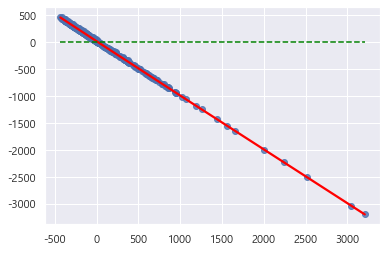

In [19]:
# 선형성 시각화(red : 잔차)
sns.regplot(s_d_res_fit, s_d_residuals, lowess=True, line_kws= {'color' : 'red'})
plt.plot([s_d_res_fit.min(), s_d_res_fit.max()], [0, 0], '--', color='green')

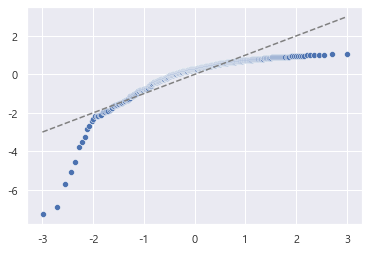

In [20]:
## 정규성 확인 (QQplot, 점 값이 선을 따라배치되는 것이 이상적)
import scipy.stats as stats
s_d_sr = stats.zscore(s_d_residuals)
(s_d_x, s_d_y), _ = stats.probplot(s_d_sr)

# 정규성 시각화
sns.scatterplot(s_d_x, s_d_y)
plt.plot([-3, 3], [-3, 3], '--', color = 'grey')

# Make Moon 을 이용한 실습

In [21]:
## 데이터셋 생성
# moon dataset
from sklearn.datasets import make_moons

In [22]:
# make_moon 함수 이용 데이터셋 생성
X,y = make_moons(n_samples = 400, noise = 0.2, random_state = 20)

df_m = pd.DataFrame(X)
print(y[:2])
print(df_m.head(3))

[0 1]
          0         1
0  1.139922 -0.172155
1  2.134988  0.233241
2  1.745228  0.186196


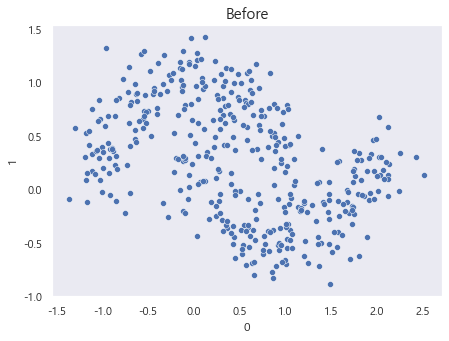

In [23]:
# X 데이터의 산점도 시각화
plt.figure(figsize = (7,5))
plt.title("Before", fontsize = 15)
sns.scatterplot(x=df_m[0], y=df_m[1], palette = "Set2")
plt.grid()
plt.show()

In [24]:
## sklearn 모듈의 tree import
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 환경변수 추가 후 환경변수 설정 아래 코드
os.environ["PATH"]+= os.pathsep + 'C:/Program Files/Graphviz/bin'

## 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 20)

# 결정트리 분류기 1개 학습
tree_clf = DecisionTreeClassifier(random_state = 20)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(tree_clf.__class__.__name__,accuracy_score(y_test, y_pred_tree))

# 배깅 학습
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators = 100,
                               bootstrap = True,
                               oob_score = True)

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
print(bagging_clf.__class__.__name__,accuracy_score(y_test, y_pred))

#oob score
print("oob socre", bagging_clf.oob_score_)

DecisionTreeClassifier 0.93
BaggingClassifier 0.93
oob socre 0.9666666666666667


In [25]:
## 시각화 
from matplotlib.colors import ListedColormap

# 시각화 함수 
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

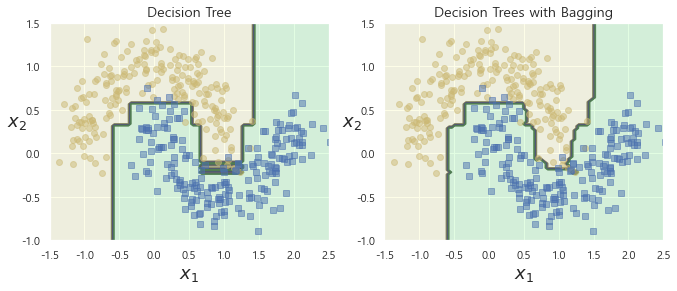

In [26]:
# 시각화 
## 전체 데이터 
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bagging_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

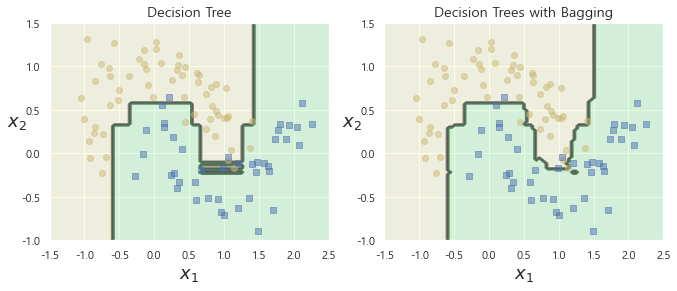

In [27]:
## 테스트 데이터 
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X_test, y_test)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bagging_clf, X_test, y_test)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

# 보팅 실습

In [28]:
# 패키지 임포트 
import os 
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 

import pandas as pd # pandas package
import numpy as np  # numpy package  
from scipy import stats  # Scipy Package 

from sklearn.model_selection import train_test_split #데이터셋 분리 
from sklearn.preprocessing import StandardScaler

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

In [29]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

from sklearn.ensemble import VotingClassifier # voting 
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트
from sklearn.linear_model import LogisticRegression #로지스틱 회귀
from sklearn.svm import SVC # 서포트벡터머신
from sklearn.model_selection import train_test_split


## 각 분류기 정의 
log_clf = LogisticRegression(random_state=20)
rnd_clf = RandomForestClassifier(random_state=20)
svm_clf = SVC(random_state=20,probability=True)

# 하드 보팅 
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), 
                                          ('svc', svm_clf)], voting='hard') # 하드 보팅 

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=20)),
                             ('rf', RandomForestClassifier(random_state=20)),
                             ('svc', SVC(probability=True, random_state=20))])

In [30]:
## 학습 및 성능 평가
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(y_pred[:15])

LogisticRegression 0.82
[1 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
RandomForestClassifier 0.93
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
SVC 0.94
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
VotingClassifier 0.93
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
## 각 분류기 정의 
log_clf = LogisticRegression(random_state=20)
rnd_clf = RandomForestClassifier(random_state=20)
svm_clf = SVC(random_state=20,probability=True)

# 소프트 보팅 
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), 
                                          ('svc', svm_clf)], voting='soft') # 하드 보팅 

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=20)),
                             ('rf', RandomForestClassifier(random_state=20)),
                             ('svc', SVC(probability=True, random_state=20))],
                 voting='soft')

In [32]:
## 성능 및 평가

for clf in (log_clf, rnd_clf, svm_clf, voting_clf) :
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
    # 2개의 값에 대한 결과 예측 확률
    y_pred_proba = clf.predict_proba(X_test)
    print("2개 값 예측")
    print(y_pred[:2])
    print(y_pred_proba[:2])
    print(" ")

LogisticRegression 0.82
2개 값 예측
[1 0]
[[0.28846989 0.71153011]
 [0.74806159 0.25193841]]
 
RandomForestClassifier 0.93
2개 값 예측
[1 0]
[[0.04 0.96]
 [0.99 0.01]]
 
SVC 0.94
2개 값 예측
[1 0]
[[0.03036439 0.96963561]
 [0.92927303 0.07072697]]
 
VotingClassifier 0.92
2개 값 예측
[1 0]
[[0.11961143 0.88038857]
 [0.88911154 0.11088846]]
 


# 부스팅 (Boosting) 실습

# Adaboosting
# from sklearn.ensemble import AdaBoostClassifier
- base_estimators : 학습에 사용하는 알고리즘, default : None → -  DecisionTreeClassifier(max_depth = 1) 이 적용
- n_estimators : 생성할 약한 학습기의 개수를 지정, default : 50
- learning_rate : 학습을 진행할 때마다 적용하는 학습률(0~1 사이의 값), default : 1

[0 1]
          0         1
0  1.139922 -0.172155
1  2.134988  0.233241
2  1.745228  0.186196


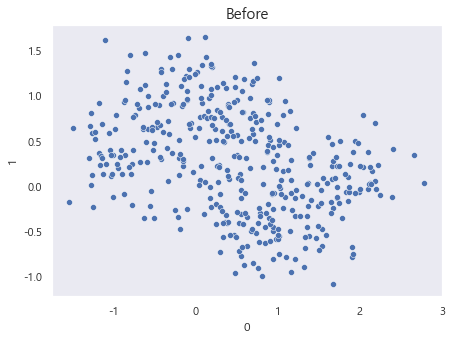

In [33]:
from sklearn.datasets import make_moons

## 데이터 셋 생성 
X, y = make_moons(n_samples=400, noise=0.30, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

## 데이터 셋 확인 
df_a = pd.DataFrame(X)
print(y[:2])
print(df_m.head(3))

# x 데이터의 산점도 시각화
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
sns.scatterplot(x=df_a[0], y=df_a[1], palette="Set2")
plt.grid()
plt.show()

In [34]:
## 라이브러리
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 기본적인 AdaBoost
clf_a = AdaBoostClassifier(n_estimators=5, random_state=20)
clf_a.fit(X_train, y_train) 
pred=clf_a.predict(X_test)
print("기본적인 AdaBoost 정확도:", accuracy_score(y_test, pred))

기본적인 AdaBoost 정확도: 0.85


In [35]:
## DecisionTree를 활용한 Adaboost

tree_clf = DecisionTreeClassifier(max_depth=5)
clf_a_t = AdaBoostClassifier(base_estimator = tree_clf, n_estimators=5, random_state=20)
clf_a_t.fit(X_train, y_train) 
pred=clf_a_t.predict(X_test)
print("Decision Tree AdaBoost 정확도:", accuracy_score(y_test, pred))

Decision Tree AdaBoost 정확도: 0.86


In [36]:
## DecisionTree를 활용한 Adaboost(n_estimators=100)

tree_clf = DecisionTreeClassifier(max_depth=5)
clf_a_t_100 = AdaBoostClassifier(base_estimator = tree_clf, n_estimators=100, random_state=20)
clf_a_t_100.fit(X_train, y_train) 
pred=clf_a_t_100.predict(X_test)

print(accuracy_score(y_test, pred))

0.89


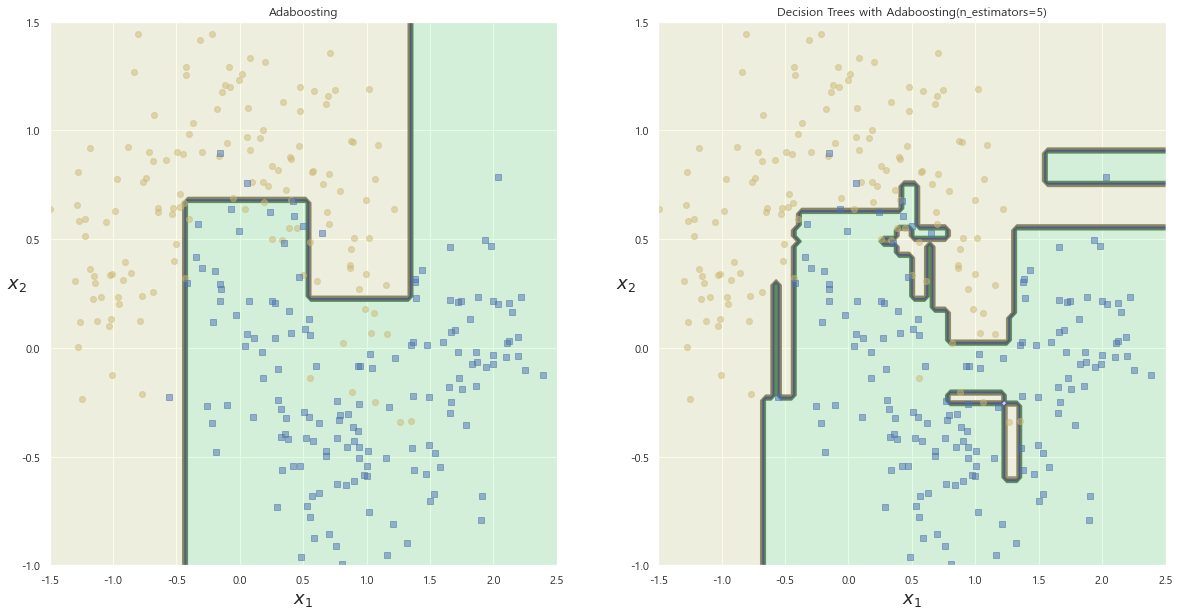

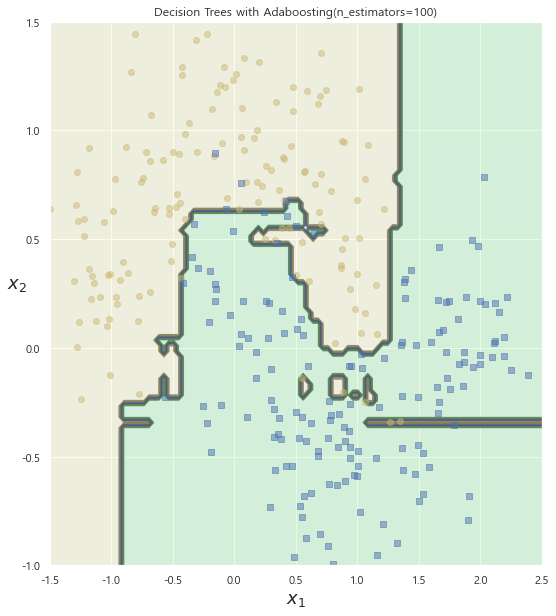

In [37]:
## 시각화 

# Adaboosting 
plt.figure(figsize=(20,10))
plt.subplot(121)
# plot_decision_boundary 정의 함수 이용
plot_decision_boundary(clf_a, X_train, y_train) 
plt.title("Adaboosting", fontsize=12)

# Decision Trees with Adaboosting(n_estimators=5)
plt.subplot(122)
# plot_decision_boundary 정의 함수 이용
plot_decision_boundary(clf_a_t, X_train, y_train) 
plt.title("Decision Trees with Adaboosting(n_estimators=5)", fontsize=12)
plt.show()

# Decision Trees with Adaboosting(n_estimators=100)
plt.figure(figsize=(30,10))
plt.subplot(132)
# plot_decision_boundary 정의 함수 이용
plot_decision_boundary(clf_a_t_100, X_train, y_train) 
plt.title("Decision Trees with Adaboosting(n_estimators=100)", fontsize=12)
plt.show()

# from xgboost import XGBClassifier
#### General Parameters (XGBoost 의 어떤 모델)
- booster : default = 'gbtree'(gbtree : 트리 기반 모델, gblinear : 선형 모델)
- silent : default = 0(0 : 동작 메세지 프린트 함, 1 : 동작 메세지 프린트 안함)
- nthread : default = 전체 다 사용

#### Booster Parameters (모델의 조건 설정)
- n_estimators : 분류기 나무의 개수, default = 100
- early_stopping_rounds
- learning_rate : 학습 단계별로 가중치, default = 0.1
- max_depth : 트리의 깊이, default = 6 
- reg_alpha :L1 regularization
- reg_lambda : L2 regularization

#### Learning Task Parameters (모델의 목표 및 계산 방법 설정)
- objective : 목적 함수, default = reg:linear
 - binary:logistic(확률 반환), multi:softmax(클래스 반환), multi:softprob(확률 반환) 
- eval_metric : 평가 지표(회귀-rmse,... / 분류-error, ...)
- seed :고정값 default = 0

In [38]:
! pip install gboost

ERROR: Could not find a version that satisfies the requirement gboost (from versions: none)
ERROR: No matching distribution found for gboost


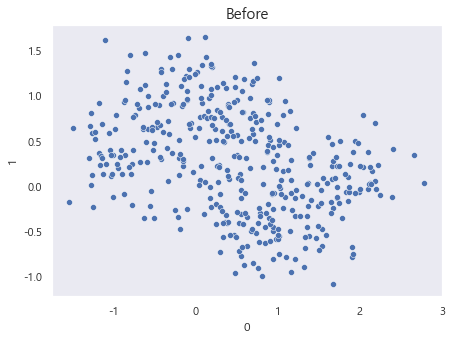

In [41]:
# 데이터셋 생성
X,y = make_moons(n_samples = 1000, noise = 0.30, random_state = 20)

# x 데이터의 산점도 시각화
plt.figure(figsize = (7,5))
plt.title("Before", fontsize = 15)
sns.scatterplot(x=df_a[0], y=df_a[1], palette = "Set2")
plt.grid()
plt.show()

In [42]:
# Train, test set 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

# Train, Validaton set 생성
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                 y_train,
                                                 test_size = 0.2,
                                                 random_state = 20)

# 결과 확인
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(640, 2) (640,) (160, 2) (160,) (200, 2) (200,)


In [44]:
## XGBoosting
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

## 단순한 XGBoost 
# 객체 생성
xgb_clf = XGBClassifier(objective = 'binary:logistic', eval_metric = 'auc')
xgb_model = xgb_clf.fit(X_train, y_train)

# 예측하기
y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)

# 결과 확인
print(accuracy_score(y_test, y_pred))

## 특성 중요도 확인
ftr_importances_values = xgb_model.feature_importances_
print(ftr_importances_values)

0.885
[0.4482242  0.55177575]


#AUC는 ROC curve의 곡선 아래 영역을 나타내며 classification 성능평가지표로 많이 사용된다.

1에 가까울수록 성능이 우수하다고 판단하며

0.5인 경우에 최악의 성능이다. (이는 model이 classification 능력이 없음을 의미한다.)

만약 AUC값이 0.5 미만이라면 Labeling 혹은 Algorithm이 잘못됐을 가능성이 크다.

In [ ]:
## 시각화 
from matplotlib.colors import ListedColormap

# 시각화 함수 
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

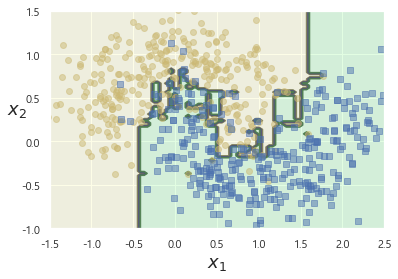

In [45]:
## 시각화
plot_decision_boundary(xgb_clf, X_train, y_train)

In [48]:
### 파라미터를 입력한 XGboost
# 분류기 100개, 학습 조정룰 : 0.03, L1 regularization: 0.03
xgb_clf_a = XGBClassifier(n_estimators = 100,
                         learning_rate = 0.03,
                         max_depth = 5,
                         reg_alpha = 0.03,
                         verbosity = 0,
                         objective = 'binary:logistic',
                         eval_metric = 'auc',
                         silent = True,
                         )

# 50라운드에서 조기  종료 확인
xgb_model_a = xgb_clf_a.fit(X_train, y_train, early_stopping_rounds = 50,
                           eval_set = [(X_val, y_val)])

[0]	validation_0-auc:0.94729
[1]	validation_0-auc:0.94776
[2]	validation_0-auc:0.94902
[3]	validation_0-auc:0.94902
[4]	validation_0-auc:0.94902
[5]	validation_0-auc:0.94745
[6]	validation_0-auc:0.94698
[7]	validation_0-auc:0.95114
[8]	validation_0-auc:0.95067
[9]	validation_0-auc:0.95035
[10]	validation_0-auc:0.95035
[11]	validation_0-auc:0.94941
[12]	validation_0-auc:0.95012
[13]	validation_0-auc:0.94973
[14]	validation_0-auc:0.94973
[15]	validation_0-auc:0.94878
[16]	validation_0-auc:0.94925
[17]	validation_0-auc:0.94973
[18]	validation_0-auc:0.94925
[19]	validation_0-auc:0.95020
[20]	validation_0-auc:0.94957
[21]	validation_0-auc:0.95059
[22]	validation_0-auc:0.95059
[23]	validation_0-auc:0.95059
[24]	validation_0-auc:0.95027
[25]	validation_0-auc:0.95035
[26]	validation_0-auc:0.95129
[27]	validation_0-auc:0.95098
[28]	validation_0-auc:0.95098
[29]	validation_0-auc:0.95098
[30]	validation_0-auc:0.95004
[31]	validation_0-auc:0.95286
[32]	validation_0-auc:0.95482
[33]	validation_0-au

In [49]:
### 결과 예측
xgb_model_a.predict(X_test[:5])

array([1, 1, 1, 1, 0])

In [50]:
# 결과 확인
y_pred_b = xgb_model_a.predict(X_test)
print(accuracy_score(y_test, y_pred_b))

## 특성 중요도 확인
ftr_importances_values = xgb_model_a.feature_importances_
print(ftr_importances_values)

0.92
[0.4033108 0.5966893]


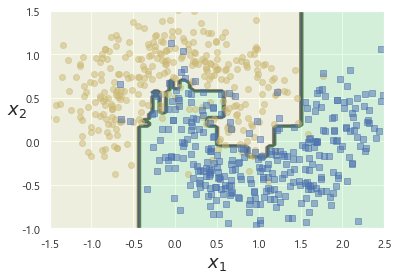

In [51]:
## 시각화
plot_decision_boundary(xgb_model_a, X_train, y_train)

# Random Forest 
##  Random Forest Regressor
### from sklearn.ensemble import RandomForestRegressor
- criterion{“squared_error”, “absolute_error”, “poisson”}, default=”squared_error”
- n_estimators : 결정트리의 갯수를 지정, Default = 10
- min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수, Default = 2
- min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수, Default = 'auto' 
- max_depth	: 트리의 최대 깊이, default = None
- max_leaf_nodes : 리프노드의 최대 개수
- bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부
- verbose : 실행 과정 출력 여부(1: 출력)
- random_state : 난수 seed 설정

In [52]:
## Boston Housing Price (보스턴 주택 가격 데이터)
from sklearn.datasets import load_boston

data_b = load_boston()
df_b = pd.DataFrame(data_b.data, columns=data_b.feature_names)

df_b['MEDV'] = data_b.target
print(df_b.shape)
df_b.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
## 각 변수 p-value < 0.05 미만 제거 
## 변수 선택 
feature_columns = list(df_b.columns.difference(['INDUS', 'AGE','CRIM', 'MEDV']))

# 변수 확정 
X = df_b[feature_columns] # 설명변수 

## 스케일링 & 정규화
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

## 데이터 생성 
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_std,
                                                            data_b.target, 
                                                            test_size=0.2, 
                                                            random_state=20)

In [54]:
feature_columns

['B', 'CHAS', 'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']

In [55]:
X_train_b[0]

array([ 0.44105193, -0.27259857,  1.02463789,  0.91070021, -0.26515405,
       -1.50523663, -0.52300145, -0.16046556, -0.57751897,  0.04877224])

In [56]:
y_train_b[0]

27.1

In [57]:
## 랜덤포레스트 특정 모델 학습
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rf_refressor = RandomForestRegressor(random_state=5,
                                     max_depth=2,
                                     min_samples_split=8,
                                     n_estimators=10)

rf_refressor.fit(X_train_b, y_train_b)

## 성능 평가 
# R2 Score
print("R2 Score:", rf_refressor.score(X_train_b, y_train_b, sample_weight=None))

# train rmse
train_predict = rf_refressor.predict(X_train_b)
print("train RMSE: {}".format(sqrt(mean_squared_error(train_predict, y_train_b)))) # RMSE 결과
 
# test rmse
test_predict = rf_refressor.predict(X_test_b)
print("test RMSE':{}".format(sqrt(mean_squared_error(test_predict, y_test_b))) )

R2 Score: 0.7688954604830928
train RMSE: 4.540534729949297
test RMSE':4.757221213720514


r2 가 0.75 이상이니 유의미하다.

In [58]:
## 랜덤포레스트 하이퍼 파리미터 조정 
rf_refressor_1 = RandomForestRegressor(random_state=5,
                                       max_depth=7, 
                                       min_samples_split=8,
                                       n_estimators=100)

rf_refressor_1.fit(X_train_b, y_train_b)


## 성능 평가 
# R2 Score
print("R2 Score:", rf_refressor_1.score(X_train_b, y_train_b, sample_weight=None))

# train rmse
train_predict = rf_refressor_1.predict(X_train_b)
print("train RMSE: {}".format(sqrt(mean_squared_error(train_predict, y_train_b)))) 
 
# test rmse
test_predict = rf_refressor_1.predict(X_test_b)
print("test RMSE':{}".format(sqrt(mean_squared_error(test_predict, y_test_b))) )

R2 Score: 0.9636313437478798
train RMSE: 1.8012184684663792
test RMSE':3.90830314943012


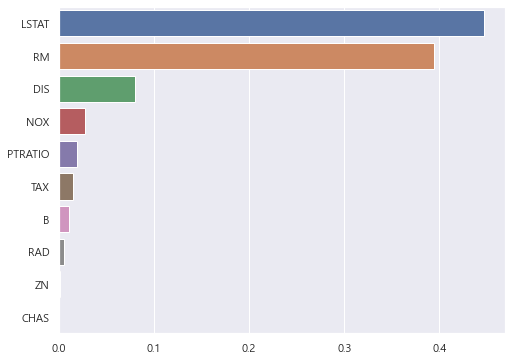

In [59]:
## 변수 중요도 시각화 

ftr_importances_values = rf_refressor_1.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=feature_columns)

ftr_top = ftr_importances.sort_values(ascending=False)
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

# 랜덤포레스트 Classifier

#  Random Forest Classifier
### from sklearn.ensemble import RandomForestClassifier
- criterion : 분할 품질을 측정,“gini”, “entropy”, “log_loss", (default : gini)”
- n_estimators : 결정트리의 갯수를 지정, Default = 10
- min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수, Default = 2
- min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수, Default = 'auto' 
- max_depth	: 트리의 최대 깊이, default = None
- max_leaf_nodes : 리프노드의 최대 개수
- bootstrap : 부트스트랩(중복허용 샘플링) 사용 여부
- verbose : 실행 과정 출력 여부(1: 출력)
- random_state : 난수 seed 설정
- oob_score : 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부

### 위스콘신 유방암(breast cancer) 데이터 셋 
- 유방암 진단 사진으로부터 측정한 종양(tumar)의 특징값을 사용하여 종양이 양성(benign)인지 악성(malignant)인지를 판별
- 30개의 속성과 malignant(악성:0), benign(양성1)의 두가지 타겟 데이터로 구성 : 총 31개 
- radius(반경)
- texture(질감)
- perimeter(둘레)
- area(면적)
- smoothness(매끄러움)
- compactness(작은 적도)
- concavity(오목함)
- concave_points(오목한 점의 수)
- symmetry(대칭)
- fractal_dimension(프랙탈 차원)
- 위 10개 세포의 특성 항목에 대해 각각평균(mean), 표준오차(error), 큰 값 3개의 평균(worst) 값을 속성으로 구성 

In [61]:
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
data = load_breast_cancer()

# 독립변수 (input data)
b_input_data = data.data

# 종양: target data 
# 악성(malignant:0), 양성(benign:1), 
b_target_data = data.target

# 종양 구분 
tumar = data.target_names

# 속성 명칭 
feature_names = data.feature_names

# print('종양 여부 결정 속성 : {}'.format(feature_names))
# print('종양 구분 : {}'.format(tumar))

breast_df = pd.DataFrame(b_input_data, columns=feature_names)
breast_df['target'] = b_target_data

# 속성명 공백에 "_"달기 
breast_df.columns = [col.replace(" ", "_") for col in breast_df.columns]

In [62]:
breast_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [64]:
# label 데이터 비율 확인 
breast_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [65]:
## 학습 데이터 셋 생성 

# 평균관련 된 3개의 속성으로 종양 여부 판단 
breast_feature = ['mean_radius', 'mean_texture', 'mean_perimeter' ]

X = breast_df[breast_feature] # 독립변수 

Y = breast_df['target']

## 표준점수로 데이터 스케일링

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)

# 80%의 데이터를 학습 데이터로, 20%를 테스트 데이터 
X_train, X_test, y_train, y_test = train_test_split(train_scaled, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 20) 

In [66]:
X_train

array([[-1.34347001,  0.55625084, -1.32710844],
       [ 3.77531785,  1.62437465,  3.91022552],
       [-0.1270372 , -0.68873007, -0.17337093],
       ...,
       [-0.80583113, -1.45433516, -0.81305474],
       [-0.92227695, -0.85395184, -0.8880209 ],
       [-0.4451331 , -0.05111368, -0.4139217 ]])

In [67]:
## 기본적인 randomforest모형
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

rf_clf = RandomForestClassifier(random_state=20, oob_score = True)
rf_clf.fit(X_train,y_train)

predict1 = rf_clf.predict(X_test)
print("accuracy:", accuracy_score(y_test, predict1))

print("oob score", rf_clf.oob_score_) # oob score 

accuracy: 0.9035087719298246
oob score 0.8901098901098901


In [68]:
# Random Forest Tree 깊이 증가

# 트리 구성 : 200개, 트리 깊이 : 100(max_depth)
rf_clf_2 = RandomForestClassifier(n_estimators=200, max_depth=2,random_state=20, oob_score = True)
rf_clf_2.fit(X_train,y_train)

predict2 = rf_clf_2.predict(X_test)
print("accuracy:", accuracy_score(y_test,predict2))

print("oob score", rf_clf_2.oob_score_) # oob score (트리 다양성 증가 -> 감소 )

accuracy: 0.9210526315789473
oob score 0.8747252747252747


In [69]:
## 예측 대상 
print(X_test[:4])

## 예측 대상의 정답 
print("실제 정답", np.array(y_test[:4]))

## 예측 결과 
predict2[:4]

[[-0.97055937  0.25605918 -0.92550398]
 [ 0.42111019  0.0210254   0.33079712]
 [ 1.27883307  1.35443486  1.35231409]
 [-0.60418105  2.08047981 -0.62605123]]
실제 정답 [1 0 0 1]


array([1, 0, 0, 1])

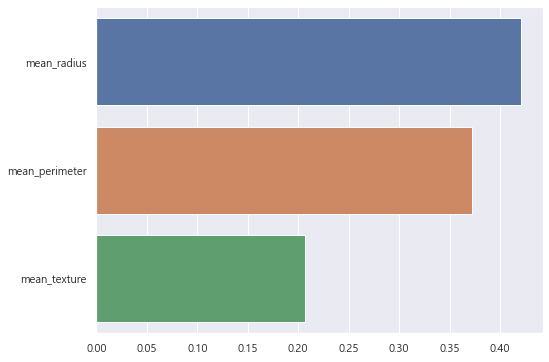

In [70]:
## 변수 중요도 시각화 
    
ftr_impo_val_clf2 = rf_clf_2.feature_importances_

ftr_importa_visual = pd.Series(ftr_impo_val_clf2, index=breast_feature)

ftr_top = ftr_importa_visual.sort_values(ascending=False)
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
